In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Covid-19 Dataset 
## Confirmed cases and Fatalities by country (n=163) from 22-Jan to 23-March

**Purepose**: This could be used to model to predict the cumulative number of confirmed COVID19 cases in various locations across the world, as well as the number of resulting fatalities, for future dates.

**Data source**: https://www.kaggle.com/c/covid19-global-forecasting-week-1/data



In [7]:
train_ = pd.read_csv("./data/covid19-global-forecasting-week-1/train.csv")
test_ = pd.read_csv("./data/covid19-global-forecasting-week-1/test.csv")

In [11]:
# Make copies to keep original untouched
train = train_.copy()
test = test_.copy()

In [12]:
train.head(3)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0


In [13]:
train['Country/Region'].value_counts()

US                                  3480
China                               1980
Canada                               660
Australia                            540
France                               480
United Kingdom                       300
Netherlands                          180
Denmark                              120
Kazakhstan                            60
Congo (Kinshasa)                      60
Saint Vincent and the Grenadines      60
Central African Republic              60
Equatorial Guinea                     60
Hungary                               60
Norway                                60
Ireland                               60
French Guiana                         60
Turkey                                60
Honduras                              60
San Marino                            60
Switzerland                           60
Greece                                60
Czechia                               60
Bahrain                               60
Benin           

## Feature Engineering 
Transforming and combining columns to generate newer columns 

In [14]:
train = train[train.Date != '']

In [15]:
# The simplest would be to compute a new column called Days that is the number of elasped from min Date 

# Convert to datetime before date subtraction can be performed 
train['Date_formatted'] =  pd.to_datetime(train['Date'])
min_date = train['Date'].min()
basedate = pd.Timestamp(min_date)
#train['Days'] = train['Date'].apply(lambda x: (x.name.to_datetime() - basedate).days)
train['Days'] = (train['Date_formatted'] - basedate).dt.days

In [16]:
min_date

'2020-01-22'

### Choose a country to perform some data analysis
*I have chosen Bangladesh, UK and Italy due to current situation and lineage*

In [17]:
df_bd = train[train['Country/Region'] == 'Bangladesh']
df_uk = train[train['Country/Region'] == 'United Kingdom']
df_it = train[train['Country/Region'] == 'Italy']
df_iran = train[train['Country/Region'] == 'Iran']

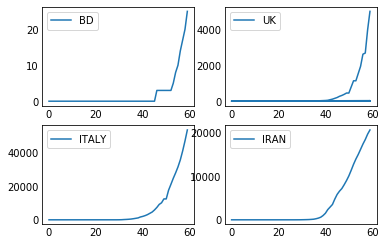

In [20]:
fig = plt.figure() 
# defining subplots 
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224) 

# Plot Bangladesh 
ax1.plot(df_bd['Days'],df_bd['ConfirmedCases'], label='BD')
ax1.tick_params(axis ='both', which ='both', length = 0) 
ax1.legend(['BD'])

# Plot UK 
ax2.plot(df_uk['Days'],df_uk['ConfirmedCases'], label='UK')
ax2.tick_params(axis ='both', which ='both', length = 0) 
ax2.legend(['UK'])

# Plot Italy
ax3.plot(df_it['Days'],df_it['ConfirmedCases'], label='IT')
ax3.tick_params(axis ='both', which ='both', length = 0) 
ax3.legend(['ITALY'])

# Plot Iran
ax4.plot(df_iran['Days'],df_iran['ConfirmedCases'], label='IRAN')
ax4.tick_params(axis ='both', which ='both', length = 0) 
ax4.legend(['IRAN'])




In [21]:
train['Date'].min()
train['Date'].max()

'2020-03-21'